** GPU 사용

# 노드 9. 모델 크기 조절과 규제

IMDB 딥러닝 모델은 과대적합이 발생하는 문제가 있었다.  
이 문제를 해결하려면 모델의 크기를 조절해야 한다.

IMDB 영화 리뷰 데이터셋 불러오기
- 텍스트 데이터를 원-핫 인코딩하여 딥러닝 모델 학습에 적합한 형태로 전처리

In [ ]:
from keras.datasets import imdb
import numpy as np

# 텍스트 시퀀스를 원-핫 인코딩으로 변환하는 함수
def one_hot_encoding(data, dim=10000):
  """
  각 리뷰(단어 인덱스 리스트)를 크기 10,000짜리 벡터로 변환
  해당 인덱스 위치만 1로 표시하고 나머지는 0으로 유지
  """
  results = np.zeros((len(data), dim))  # 전체 샘플 수 x 단어 차원 수
  for i, d in enumerate(data):
    results[i, d] = 1.  # 각 리뷰에서 등장한 단어 인덱스를 1로 설정
  return results

# IMDB 리뷰 데이터셋 로드 (가장 자주 등장한 상위 10,000개 단어만 사용)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# 훈련/테스트 데이터를 원-핫 인코딩 처리
x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

# 라벨(긍정:1 / 부정:0)을 float32 타입으로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

<br>

심층 신경망(DNN) 모델 구성
- IMDB 영화 리뷰가 긍정인지 부정인지를 판별하는 이진 분류 모델
- 입력: 10,000차원의 원-핫 인코딩된 벡터
- 출력: 이진 분류(긍정/부정)를 위한 확률

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()

# 입력층 및 첫 번째 은닉층 (128개의 뉴런, ReLU 활성화 함수)
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
# 두 번째 은닉층 (128개의 뉴런, ReLU 활성화 함수)
model.add(layers.Dense(128, activation='relu', name='hidden'))
# 출력층 (1개의 뉴런, sigmoid로 확률 출력 → 이진 분류)
model.add(layers.Dense(1, activation='sigmoid', name='output'))

# 모델 컴파일
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',  # 이진 분류
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,296,769 (4.95 MB)

 Trainable params: 1,296,769 (4.95 MB)

 Non-trainable params: 0 (0.00 B)

<br>

모델 학습
- 훈련 데이터와 검증 데이터를 통해 30 에폭 동안 모델 반복 학습

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=30,       # 전체 학습 데이터셋을 30번 반복 학습
                    batch_size=512,  # 한 번에 512개 샘플씩 처리하여 가중치 업데이트
                    validation_data=(x_test, y_test))  # 매 epoch마다 테스트셋으로 검증 (과적합 확인용)

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.7021 - loss: 0.5534 - val_accuracy: 0.8825 - val_loss: 0.3011
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8930 - loss: 0.2756 - val_accuracy: 0.8723 - val_loss: 0.3095
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9146 - loss: 0.2173 - val_accuracy: 0.8854 - val_loss: 0.2770
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9361 - loss: 0.1663 - val_accuracy: 0.8834 - val_loss: 0.2867
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9496 - loss: 0.1372 - val_accuracy: 0.8560 - val_loss: 0.3748
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9603 - loss: 0.1091 - val_accuracy: 0.8796 - val_loss: 0.3242
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9777 - loss: 0.0720 - val_accuracy: 0.8515 - val_loss: 0.4373
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9819 - loss: 0.0580 - val_accuracy: 0.8765 - 

<br>

모델 학습 결과를 시각화

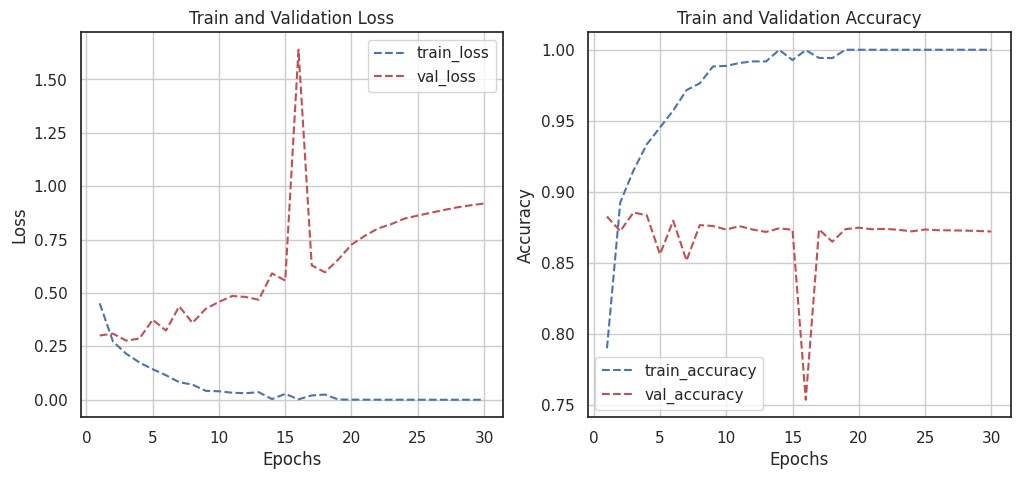

In [ ]:
import matplotlib.pyplot as plt

# history 객체에서 손실(loss) 및 정확도(accuracy) 정보 추출
history_dict = history.history

# 훈련 손실과 검증 손실
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# 에폭 수 정의
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

# (1) 훈련/검증 손실 그래프
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

# # 훈련 정확도와 검증 정확도
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

# (2) 훈련/검증 정확도 그래프
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

<br>

큰 규모의 신경망 모델(b_model) 정의
- IMDB 리뷰 감성 분류(binary classification) 문제
- 입력 벡터 크기: 10,000차원(단어의 원-핫 인코딩)
- 은닉층: 2048개 유닛을 가진 Dense 층 2개
- 출력: 시그모이드 활성화로 이진 분류

주의) 2048 유닛을 두 번이나 사용하는 모델은 상당히 복잡하고 파라미터 수가 매우 많아짐. 과적합이 발생할 확률이 높고, 학습 시간도 오래 걸릴 수 있음.

In [ ]:
# 큰 모델 정의 (b_model)
b_model = models.Sequential()

# 첫 번째 은닉층: 2048개의 유닛, ReLU 활성화 함수
b_model.add(layers.Dense(2048, activation='relu', input_shape=(10000, ), name='input3'))
# 두 번째 은닉층: 2048개의 유닛, ReLU 활성화 함수
b_model.add(layers.Dense(2048, activation='relu', name='hidden3'))
# 출력층: 1개의 유닛, Sigmoid 함수로 확률 출력 (이진 분류)
b_model.add(layers.Dense(1, activation='sigmoid', name='output3'))

# 모델 컴파일
b_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',  # 이진 교차 엔트로피 손실 함수 사용
                metrics=['accuracy'])

b_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input3 (Dense)                  │ (None, 2048)           │    20,482,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden3 (Dense)                 │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output3 (Dense)                 │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,680,449 (94.15 MB)

 Trainable params: 24,680,449 (94.15 MB)

 Non-trainable params: 0 (0.00 B)

<br>

복잡한 신경망 모델 b_model 학습
- 학습 데이터로 30번의 epoch 동안 학습
- 매 epoch마다 검증 데이터로 성능 평가

In [ ]:
b_model_history = b_model.fit(
    x_train,            # 입력 데이터 (원-핫 인코딩된 리뷰)
    y_train,            # 정답 레이블 (0 또는 1)
    epochs=30,          # 전체 데이터를 30번 반복 학습
    batch_size=512,     # 한 번에 학습할 데이터 수
    validation_data=(x_test, y_test)  # 검증 데이터 (성능 평가용)
)

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.6226 - loss: 0.7179 - val_accuracy: 0.7968 - val_loss: 0.4627
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.8620 - loss: 0.3246 - val_accuracy: 0.8885 - val_loss: 0.2697
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9162 - loss: 0.2119 - val_accuracy: 0.8886 - val_loss: 0.2680
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9414 - loss: 0.1586 - val_accuracy: 0.8834 - val_loss: 0.2883
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9622 - loss: 0.1090 - val_accuracy: 0.8839 - val_loss: 0.3116
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9688 - loss: 0.0873 - val_accuracy: 0.7751 - val_loss: 0.8060
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9647 - loss: 0.0931 - val_accuracy: 0.8794 - val_loss: 0.4023
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9908 - loss: 0.0400 - val_accuracy: 0.8810 -

<br>

기존 모델과 더 복잡한 모델(b_model)의 학습 성능 시각화
- 학습 손실 및 정확도, 검증 손실 및 정확도를 동일 그래프에 겹쳐서 표시

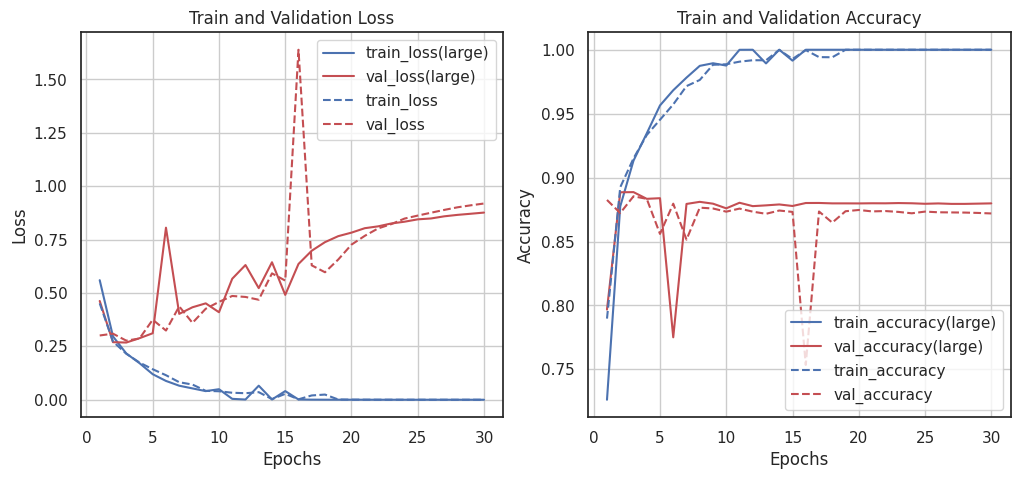

In [ ]:
# b_model 학습 결과에서 손실 및 정확도 정보 추출
b_history_dict = b_model_history.history

# 훈련/검증 손실
b_loss = b_history_dict['loss']
b_val_loss = b_history_dict['val_loss']
epochs = range(1, len(b_loss) + 1)  # epoch 수만큼 x축 생성

fig = plt.figure(figsize=(12, 5))

# --- 첫 번째 그래프: 손실 시각화 ---
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

# 훈련/검증 정확도
b_accuracy = b_history_dict['accuracy']
b_val_accuracy = b_history_dict['val_accuracy']

# --- 두 번째 그래프: 정확도 시각화 ---
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

해석 방향
- b_model이 더 복잡하므로 훈련 정확도는 더 높게 나타날 가능성이 높음
- 그러나 검증 정확도(val_accuracy)가 오히려 감소하거나 정체된다면, 이는 과적합(overfitting) 신호
- 이런 비교를 통해 모델 복잡도를 조절하거나 Dropout, 정규화, 조기 종료(EarlyStopping) 등의 기법을 적용할 수 있는 근거가 됨

<br>

매우 간단한 신경망 모델(b_model) 정의
- 기존 모델보다 은닉층의 유닛 수를 줄여서 파라미터 수를 획기적으로 줄인 소형 모델(small model) 구성

In [ ]:
# 간단한 모델(s_model) 정의
s_model = models.Sequential()
# 입력층 + 첫 번째 은닉층: 16개의 유닛 (ReLU 활성화 함수)
s_model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input2'))
# 두 번째 은닉층: 16개의 유닛 (ReLU 활성화 함수)
s_model.add(layers.Dense(16, activation='relu', name='hidden2'))
# 출력층: 이진 분류이므로 유닛 1개, 시그모이드 활성화
s_model.add(layers.Dense(1, activation='sigmoid', name='output2'))

# 모델 컴파일
s_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

s_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input2 (Dense)                  │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

<br>

소형 모델 s_model 학습

In [ ]:
s_model_history = s_model.fit(
    x_train,           # 훈련 데이터 (10000차원 one-hot encoded 벡터)
    y_train,           # 훈련 레이블 (0 또는 1)
    epochs=30,         # 총 30번 반복 학습
    batch_size=512,    # 512개 샘플씩 묶어 한 번에 학습
    validation_data=(x_test, y_test)  # 검증 데이터 지정 (모델 성능 평가용)
)

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.6920 - loss: 0.5930 - val_accuracy: 0.8705 - val_loss: 0.3824
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8980 - loss: 0.3222 - val_accuracy: 0.8866 - val_loss: 0.3014
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9223 - loss: 0.2302 - val_accuracy: 0.8872 - val_loss: 0.2838
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9324 - loss: 0.1944 - val_accuracy: 0.8819 - val_loss: 0.2923
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9426 - loss: 0.1684 - val_accuracy: 0.8832 - val_loss: 0.2960
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9514 - loss: 0.1447 - val_accuracy: 0.8826 - val_loss: 0.3027
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9582 - loss: 0.1282 - val_accuracy: 0.8770 - val_loss: 0.3231
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9611 - loss: 0.1185 - val_accuracy: 0.8742 - v

<br>

세 가지 모델의 학습/검증 손실 및 정확도 비교 시각화
- 각각 대형 모델(2048 units), 기본 모델(128 units), 소형 모델(16 units)의 학습 결과

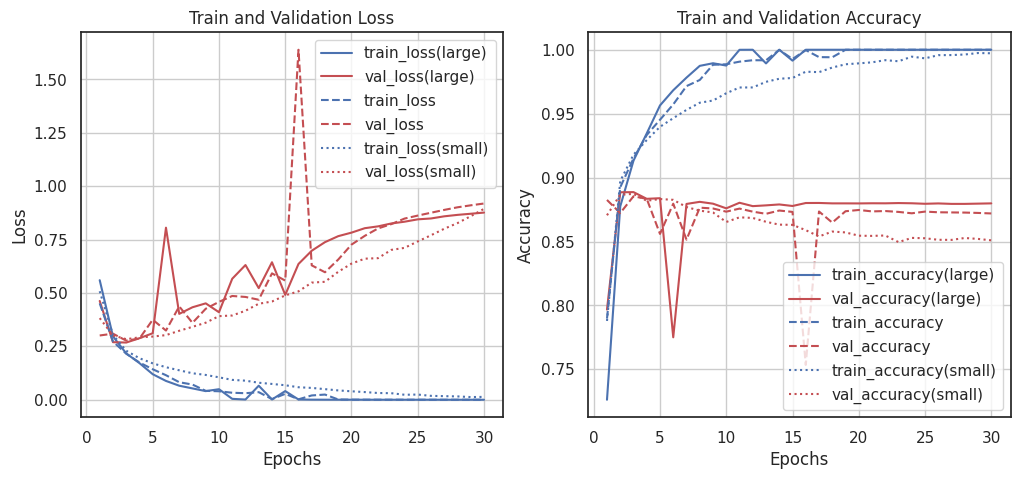

In [ ]:
# s_model (소형 모델)의 학습 기록 추출
s_history_dict = s_model_history.history

# 손실값 및 에포크 범위 설정
s_loss = s_history_dict['loss']
s_val_loss = s_history_dict['val_loss']
epochs = range(1, len(s_loss) + 1)

fig = plt.figure(figsize=(12, 5))

# ---- 손실 비교 ----
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.plot(epochs, s_loss, 'b:', label='train_loss(small)')
ax1.plot(epochs, s_val_loss, 'r:', label='val_loss(small)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

s_accuracy = s_history_dict['accuracy']
s_val_accuracy = s_history_dict['val_accuracy']

# ---- 정확도 비교 ----
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.plot(epochs, s_accuracy, 'b:', label='train_accuracy(small)')
ax2.plot(epochs, s_val_accuracy, 'r:', label='val_accuracy(small)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

해석 방향
- 과적합 여부 확인: 대형 모델이 에포크가 증가할수록 val_loss가 급격히 상승했다면 과적합
- 소형 모델의 일반화 성능: 손실과 정확도의 차이가 적다면 일반화가 잘된 모델일 가능성이 높음
- 적절한 모델 크기 선정: 복잡도와 일반화 사이의 균형을 고려해 16, 128, 2048 중 적절한 선택 필요

<br>

L1 정규화를 적용한 심층 신경망 모델(l1_model) 정의
- 목표: 과적합(overfitting) 방지를 위한 L1 정규화(=Lasso 정규화) 적용

L1 정규화 (Lasso)
- 모델의 가중치 합의 절댓값을 패널티로 추가
- 중요하지 않은 가중치는 0에 가깝게 만들어 feature selection 효과를 줌
    - 모델이 덜 복잡한 방식으로 패턴을 학습하도록 유도
- 특히 `input_shape=(10000,)`처럼 고차원 sparse 벡터에서 매우 효과적

In [ ]:
l1_model =  models.Sequential()

# 첫 번째 은닉층: L1 정규화 + ReLU
l1_model.add(layers.Dense(16,
                          kernel_regularizer='l1',  # 가중치 L1 정규화 적용
                          activation='relu',
                          input_shape=(10000, )))

# 두 번째 은닉층: 동일하게 L1 정규화 적용
l1_model.add(layers.Dense(16,
                          kernel_regularizer='l1',
                          activation='relu'))

# 출력층: 이진 분류를 위한 sigmoid 함수
l1_model.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

l1_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

<br>

L1 정규화 모델 학습

In [ ]:
l1_model_hist = l1_model.fit(
    x_train,           # 훈련 데이터
    y_train,           # 훈련 라벨
    epochs=30,         # 총 30번 반복 학습
    batch_size=512,    # 한 번에 512개의 샘플을 사용해 학습
    validation_data=(x_test, y_test)  # 검증 데이터로 과적합 여부 확인
)

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.5429 - loss: 7.1630 - val_accuracy: 0.5554 - val_loss: 1.9428
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.6138 - loss: 1.8992 - val_accuracy: 0.6998 - val_loss: 1.8025
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6687 - loss: 1.7904 - val_accuracy: 0.6829 - val_loss: 1.7346
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6769 - loss: 1.7048 - val_accuracy: 0.6885 - val_loss: 1.6399
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6896 - loss: 1.6337 - val_accuracy: 0.6910 - val_loss: 1.5968
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7017 - loss: 1.5724 - val_accuracy: 0.7196 - val_loss: 1.5181
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7257 - loss: 1.5133 - val_accuracy: 0.7398 - val_loss: 1.4851
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7494 - loss: 1.4660 - val_accuracy: 0.7459 - 

<br>

기존 모델과 L1 정규화 모델의 검증 손실 비교 시각화

| 개념                    | 설명                                                                                  |
| --------------------- | ----------------------------------------------------------------------------------- |
| **L1 Regularization** | 가중치의 절댓값 합을 비용 함수에 추가하여 과적합을 방지하는 방식.<br>중요하지 않은 가중치는 0으로 만들어 feature selection 효과도 있음 |
| **Validation Loss**   | 모델이 학습하지 않은 데이터에 대해 얼마나 잘 일반화되는지를 나타내는 지표.<br>낮을수록 일반화 성능이 좋음                          |
| **과적합(Overfitting)**  | 학습 데이터에만 과하게 적응하여 새로운 데이터에서는 성능이 떨어지는 현상.<br>L1 정규화는 이를 완화하는 데 사용됨                     |


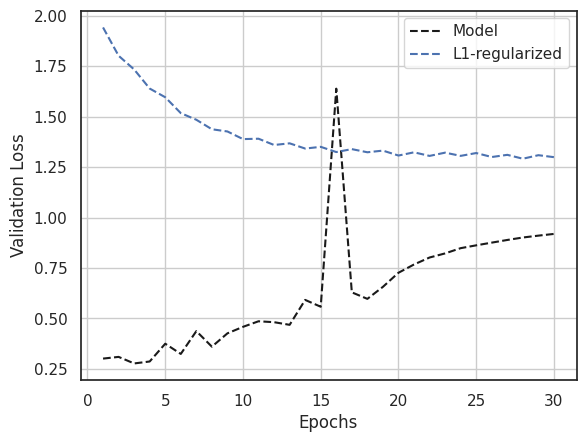

In [ ]:
# L1 정규화 모델의 학습 결과에서 검증 손실 추출
l1_val_loss = l1_model_hist.history['val_loss']

# 에포크 범위 설정 (1~30)
epochs = range(1, 31)

# 기존 모델의 검증 손실 시각화 (검정 점선)
plt.plot(epochs, val_loss, 'k--', label='Model')
# L1 정규화 모델의 검증 손실 시각화 (파란 점선)
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

해석 방향

- l1_val_loss가 val_loss보다 더 낮거나 더 안정적이라면 → L1 정규화로 과적합이 완화되었음을 의미
- 반대로 l1_val_loss가 더 높게 나왔다면 → 모델의 복잡도가 너무 제한되어 과소적합이 발생했을 수 있음



<br>

L2 정규화를 적용한 심층 신경망 모델(l2_model) 정의
- Dense 층마다 `kernel_regularizer='l2'`를 적용하여
- 가중치 크기에 대한 패널티를 손실 함수에 더하여 과적합 방지

L2 정규화
- 가중치의 제곱합을 손실에 추가해 큰 가중치를 억제
- 과적합 방지에 효과적이며 weight decay라고도 불림

In [ ]:
# Sequential 모델 생성
l2_model = models.Sequential()

# 첫 번째 은닉층: 16개의 유닛, L2 정규화, ReLU 활성화 함수
l2_model.add(layers.Dense(16,
                          kernel_regularizer='l2',  # L2 정규화 적용
                          activation='relu',
                          input_shape=(10000, )))  # 입력 차원: 10,000

# 두 번째 은닉층: 동일한 구성
l2_model.add(layers.Dense(16,
                          kernel_regularizer='l2',
                          activation='relu'))

# 출력층: 1개의 유닛, sigmoid 함수로 이진 분류
l2_model.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

l2_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

<br>

L2 정규화 모델 학습

In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.7075 - loss: 0.8986 - val_accuracy: 0.8475 - val_loss: 0.6037
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8741 - loss: 0.5567 - val_accuracy: 0.8730 - val_loss: 0.5188
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8846 - loss: 0.4892 - val_accuracy: 0.8786 - val_loss: 0.4832
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8930 - loss: 0.4533 - val_accuracy: 0.8744 - val_loss: 0.4702
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8981 - loss: 0.4284 - val_accuracy: 0.8794 - val_loss: 0.4499
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9018 - loss: 0.4119 - val_accuracy: 0.8815 - val_loss: 0.4371
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8990 - loss: 0.4044 - val_accuracy: 0.8818 - val_loss: 0.4315
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9008 - loss: 0.3958 - val_accuracy: 0.8738 - 

<br>

L2 정규화를 적용한 모델과 기본 모델의 검증 손실 비교 시각화

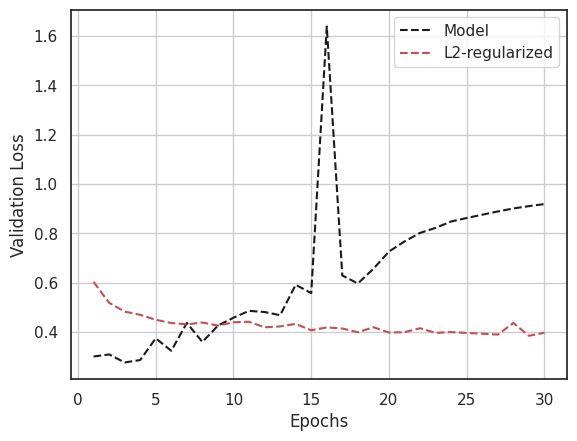

In [ ]:
# L2 정규화 모델의 검증 손실 값 추출
l2_val_loss = l2_model_hist.history['val_loss']

# 에폭 수에 맞는 x축 범위 정의 (1~30)
epochs = range(1, 31)

# 기존 모델의 검증 손실 그래프 (점선: 검정색)
plt.plot(epochs, val_loss, 'k--', label='Model')
# L2 정규화 모델의 검증 손실 그래프 (점선: 빨간색)
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

해석 방향

- val_loss가 감소하다가 다시 증가하는 구간이 있다면 과적합 신호
- 만약 l2_val_loss가 전체적으로 더 낮고 부드럽다면 L2 정규화가 과적합을 잘 억제한 것

<br>

L1 + L2 정규화를 동시에 적용한 신경망 모델 정의
- IMDb 데이터셋 분류를 위한 이진 분류 모델 정의
- 각 Dense 층에 L1과 L2 정규화를 동시에 적용(regularizers.l1_l2)
    - 과적합 방지 효과 기대
- 모델 구조
    - 입력층: 10,000차원 벡터
    - 은닉층: 16개 유닛, ReLU, L1+L2 정규화
    - 출력층: sigmoid → 이진 분류



In [ ]:
## 업데이트 되면서 아래처럼 진행해주셔야합니다


# l1_l2_model = models.Sequential()
# l1_l2_model.add(layers.Dense(16,
#                              kernel_regularizer='l1_l2',
#                              activation='relu', input_shape=(10000, )))
# l1_l2_model.add(layers.Dense(16,
#                              kernel_regularizer='l1_l2',
#                              activation='relu'))
# l1_l2_model.add(layers.Dense(1, activation='sigmoid'))
# l1_l2_model.compile(optimizer='rmsprop',
#                     loss='binary_crossentropy',
#                     metrics=['accuracy'])
# l1_l2_model.summary()


from tensorflow.keras import models, layers, regularizers

# Sequential 모델 정의
l1_l2_model = models.Sequential()

# 첫 번째 은닉층: L1, L2 정규화 포함
l1_l2_model.add(layers.Dense(16,
                             kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),  # L1, L2 모두 적용
                             activation='relu',
                             input_shape=(10000,)))  # 입력 차원: 10000 (one-hot 벡터 크기)

# 두 번째 은닉층: 동일한 정규화 적용
l1_l2_model.add(layers.Dense(16,
                             kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                             activation='relu'))

# 출력층: sigmoid → 이진 분류
l1_l2_model.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일: RMSProp + 이진 크로스엔트로피 + 정확도 측정
l1_l2_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

l1_l2_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

<br>

L1 + L2 정규화 모델 학습

In [ ]:
l1_l2_model_hist = l1_l2_model.fit(
    x_train,             # 훈련 데이터 입력
    y_train,             # 훈련 데이터 라벨
    epochs=30,           # 전체 학습을 30회 반복
    batch_size=512,      # 한 번에 512개 샘플씩 학습
    validation_data=(x_test, y_test)  # 검증용 데이터 (오버피팅 여부 확인용)
)

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 0.7077 - loss: 1.4133 - val_accuracy: 0.8338 - val_loss: 0.6840
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8488 - loss: 0.6518 - val_accuracy: 0.8551 - val_loss: 0.6111
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8572 - loss: 0.5961 - val_accuracy: 0.8602 - val_loss: 0.5783
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8547 - loss: 0.5826 - val_accuracy: 0.8630 - val_loss: 0.5587
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8666 - loss: 0.5564 - val_accuracy: 0.8541 - val_loss: 0.5701
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8667 - loss: 0.5437 - val_accuracy: 0.8635 - val_loss: 0.5453
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8666 - loss: 0.5369 - val_accuracy: 0.8468 - val_loss: 0.5713
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8694 - loss: 0.5293 - val_accuracy: 0.8656 - 

<br>

기존 기본 모델과 L1 + L2 정규화가 적용된 모델의 검증 손실 비교 시각화

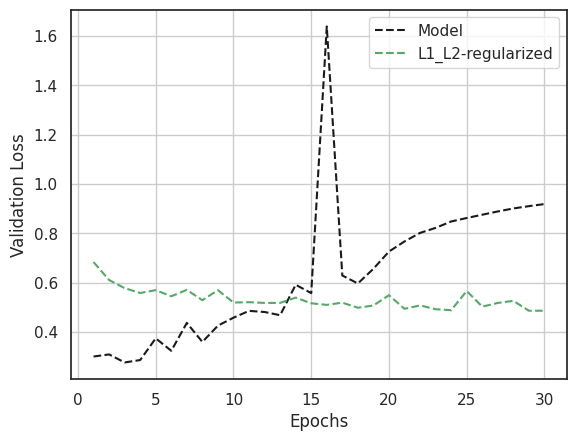

In [ ]:
# L1_L2 정규화 모델 학습 이력에서 검증 손실 값 추출
l1_l2_val_loss = l1_l2_model_hist.history['val_loss']

# 총 30 에포크(epoch)에 대한 범위 정의 (x축)
epochs = range(1, 31)

# 기본 모델의 검증 손실 그래프 (검정 점선)
plt.plot(epochs, val_loss, 'k--', label='Model')

# L1_L2 정규화 모델의 검증 손실 그래프 (초록 점선)
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

해석 방향
- 정규화를 적용한 모델이 일반적인 모델보다 검증 손실이 더 낮거나 안정적이라면  
    → 일반화 성능이 더 우수하고, 과적합이 억제되었다고 해석할 수 있음

<br>

총 4개의 모델에 대한 검증 손실 비교 시각화
- 정규화 기법(L1, L2, L1_L2)이 적용된 모델들이 기본 모델에 비해 과적합을 얼마나 억제했는지, 일반화 성능이 어떤지를 직관적으로 확인

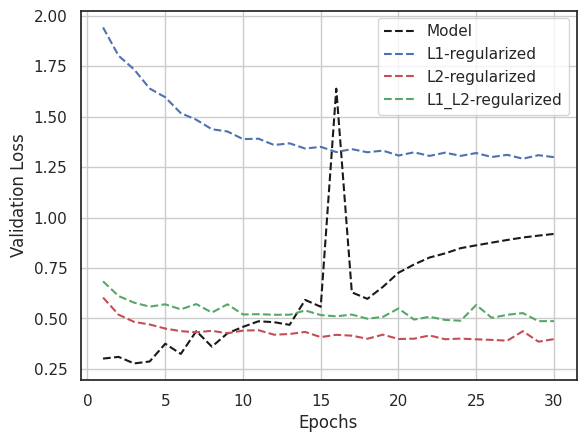

In [ ]:
# 에포크 수 (1부터 30까지)
epochs = range(1, 31)

# 기본 모델의 검증 손실 (검정 점선)
plt.plot(epochs, val_loss, 'k--', label='Model')
# L1 정규화 모델의 검증 손실 (파랑 점선)
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
# L2 정규화 모델의 검증 손실 (빨강 점선)
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
# L1+L2 정규화 모델의 검증 손실 (초록 점선)
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

<br>

Dropout(20%) 심층 신경망 모델 구성
- 각 은닉층 뒤에 Dropout 정규화 기법을 추가하여 과적합 방지
- 입력: 10,000차원 벡터이며
- 출력: 이진 분류를 위한 sigmoid 활성화 함수가 있는 1개의 노드

Dropout
- 학습 중 일부 뉴런을 랜덤하게 비활성화함으로써
- 모델이 특정 노드에 과도하게 의존하는 것을 방지하고
- 과적합(overfitting)을 줄이기 위한 기법

In [ ]:
# 모델 초기화
model = models.Sequential()

# 첫 번째 은닉층 (ReLU 활성화) + 드롭아웃
model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='hidden1'))
model.add(layers.Dropout(0.2, name='dropout1'))  # 20% 뉴런 비활성화

# 두 번째 은닉층 (ReLU 활성화) + 드롭아웃
model.add(layers.Dense(16, activation='relu', name='hidden2'))
model.add(layers.Dropout(0.2, name='dropout2'))  # 20% 뉴런 비활성화

# 출력층 (sigmoid 활성화 → 이진 분류)
model.add(layers.Dense(1, activation='sigmoid', name='output'))

# 모델 컴파일 (이진 분류에 적합한 손실함수와 평가지표)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

<br>

Dropout(20%) 적용된 모델 학습

In [ ]:
drop_20_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - accuracy: 0.6799 - loss: 0.6094 - val_accuracy: 0.8708 - val_loss: 0.3872
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8667 - loss: 0.3717 - val_accuracy: 0.8762 - val_loss: 0.3171
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8986 - loss: 0.2819 - val_accuracy: 0.8875 - val_loss: 0.2858
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9225 - loss: 0.2224 - val_accuracy: 0.8880 - val_loss: 0.2800
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9378 - loss: 0.1900 - val_accuracy: 0.8860 - val_loss: 0.2885
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9494 - loss: 0.1580 - val_accuracy: 0.8757 - val_loss: 0.3115
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9545 - loss: 0.1381 - val_accuracy: 0.8796 - val_loss: 0.3189
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9628 - loss: 0.1172 - val_accuracy: 0.8674 - 

<br>

Dropout(20%)을 적용한 모델과 기존 기본 모델 시각화

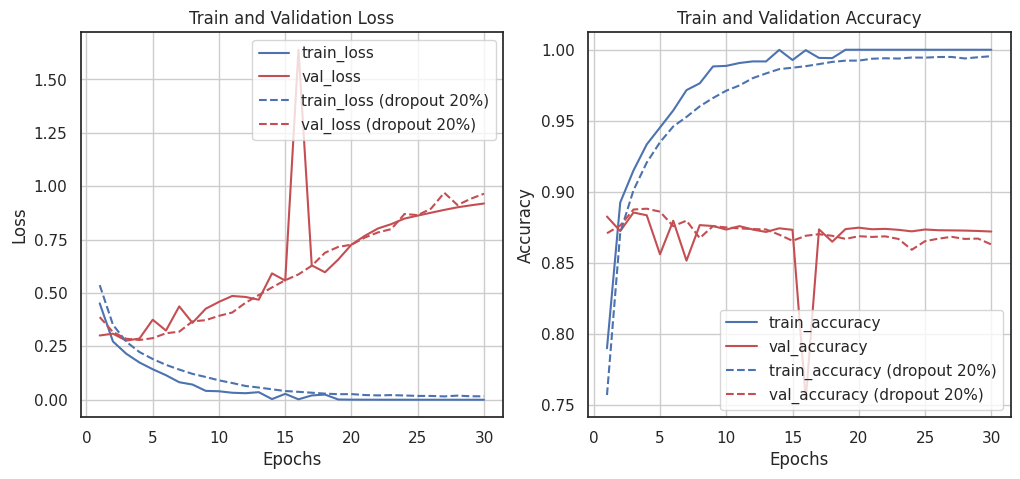

In [ ]:
# Dropout이 적용된 모델의 학습 결과(history 객체)에서 metric 정보 추출
drop_20_dict = drop_20_history.history

# 손실값과 정확도 정보 가져오기
drop_20_loss = drop_20_dict['loss']
drop_20_val_loss = drop_20_dict['val_loss']

# 에포크 수 설정 (기존 loss 기준으로 길이 맞춤)
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

# 손실(Loss) 시각화
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

# 정확도(Accuracy) 시각화
drop_20_accuracy = drop_20_dict['accuracy']
drop_20_val_accuracy = drop_20_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

해석 방향
- Dropout은 학습 중 일부 뉴런을 랜덤하게 제거함으로써 특정 노드에 의존하는 것을 방지
- 위 실험에서는 Dropout(0.2) 즉, 20%의 뉴런을 무작위로 꺼서 과적합(overfitting)을 줄이려는 시도를 한 것
- 과적합이 심했다면 Dropout 모델의 val_loss 곡선이 더 낮게 유지되며 안정적일 것
- 정확도 역시 val_accuracy가 높게 유지되면 Dropout이 유효했음을 의미

<br>

Dropout(50%) 심층 신경망 모델 구성
- 입력층: 10,000차원 벡터 (IMDB 리뷰 벡터 같은 희소 텍스트 표현)
- 은닉층1: 16개의 뉴런, ReLU 활성화 함수 사용
→ 이후 Dropout(0.5)로 절반의 뉴런 비활성화
- 은닉층2: 동일하게 16개 뉴런 + Dropout(0.5)
- 출력층: 시그모이드 함수로 이진 분류 (0 or 1)

=> 과적합 방지를 위해 강하게 Dropout을 적용한 실험

In [ ]:
model = models.Sequential()

# 첫 번째 Dense 은닉층 (입력 차원: 10,000)
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
# 50% Dropout 적용
model.add(layers.Dropout(0.5))

# 두 번째 Dense 은닉층
model.add(layers.Dense(16, activation='relu'))
# 50% Dropout 적용
model.add(layers.Dropout(0.5))

# 출력층: sigmoid를 사용한 이진 분류
model.add(layers.Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

<br>

Dropout(50%) 적용된 모델 학습

In [ ]:
drop_50_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - accuracy: 0.5993 - loss: 0.6499 - val_accuracy: 0.8628 - val_loss: 0.4374
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7965 - loss: 0.4710 - val_accuracy: 0.8784 - val_loss: 0.3330
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8541 - loss: 0.3677 - val_accuracy: 0.8875 - val_loss: 0.2909
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8860 - loss: 0.3093 - val_accuracy: 0.8891 - val_loss: 0.2777
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9041 - loss: 0.2690 - val_accuracy: 0.8893 - val_loss: 0.2778
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9167 - loss: 0.2379 - val_accuracy: 0.8898 - val_loss: 0.2841
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9260 - loss: 0.2117 - val_accuracy: 0.8867 - val_loss: 0.2941
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9338 - loss: 0.1972 - val_accuracy: 0.8829 - 

<br>

드롭아웃 0%, 20%, 50% 모델 성능 비교 시각화

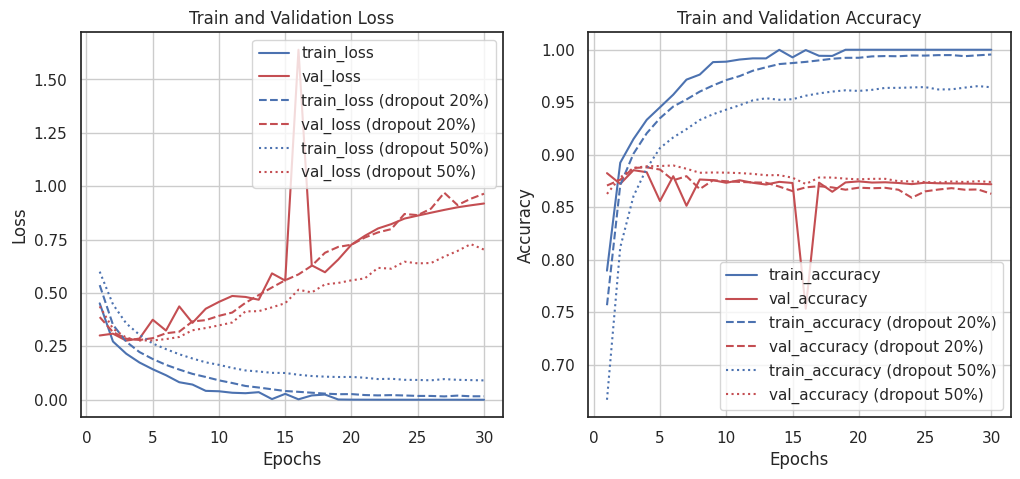

In [ ]:
# 드롭아웃 50% 모델 학습 결과 저장
drop_50_dict = drop_50_history.history

# 손실 값 추출
drop_50_loss = drop_50_dict['loss']
drop_50_val_loss = drop_50_dict['val_loss']

# (기존 기본 모델 loss가 정의되어 있음)
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

# 1. Train/Validation Loss Plot
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.plot(epochs, drop_50_loss, 'b:', label='train_loss (dropout 50%)')
ax1.plot(epochs, drop_50_val_loss, 'r:', label='val_loss (dropout 50%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

# 정확도 값 추출
drop_50_accuracy = drop_50_dict['accuracy']
drop_50_val_accuracy = drop_50_dict['val_accuracy']

# 2. Train/Validation Accuracy Plot
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.plot(epochs, drop_50_accuracy, 'b:', label='train_accuracy (dropout 50%)')
ax2.plot(epochs, drop_50_val_accuracy, 'r:', label='val_accuracy (dropout 50%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()